In [30]:
#  5-D Synthetic dataset 

import pulp as p 
import math

 # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal





############################33
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data3 = make_classification(n_samples=4000, n_features=10, n_informative=4, n_redundant=6, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.00, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=11)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,11)])
df3['y'] = data3[1]
df3.head()

# print(df3)

df=df3.drop(columns=['x1','x2','x3','x4','x5'])
n=int(4000*.70)

df_x=df3.drop(columns=['x6','x7','x8','x9','x10','y'])

# print(df)
# df_sensitive=df.copy()


DI=np.zeros(5,dtype='float')
DI_f=np.zeros(5,dtype='float')
for j in range(5):  
    a=0
    b=0
    acc1=0
    acc2=0
    for i in range(df.shape[0]): 
       
        if df.iloc[i,j]>=0:
            a=a+1
            df.iloc[i,j]=1
            if df.iloc[i,5]==1 :
                acc1=acc1+1
            
                    
        else:
            b=b+1
            df.iloc[i,j]=0
            if df.iloc[i,5]==1 :
                acc2=acc2+1
                
#     print(acc1)
#     print(acc2)
    a1=float(acc1/a)
    b1=float(acc2/b)
    DI[j]=abs(a1-b1)
#     print(DI[j])
    
    if (a1>=b1 and a1>0):
            DI_f[j]=float(b1/a1)
    elif (a1<b1 and b1>0) :
            DI_f[j]=float(a1/b1)
#     print(DI_f[j])
    
#     print(a,b) 
    print('DI-----------------')
    print(a,b)
    print(a1,b1)
# df.head()


print(df.head())

for j in range(5):  
    for i in range(df_x.shape[0]): 
       
        if df_x.iloc[i,j]>=0:
            df_x.iloc[i,j]=1  
        else:
            df_x.iloc[i,j]=0
print(df_x.head())            

datai=df.drop(columns=['y'])

ri=df.drop(columns=['x6','x7','x8','x9','x10'])

# n=data.shape[0]

##########################
data=datai.loc[0:n-1]
#######################







a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
i1=0
j=0
print(n)
print(n)
print(n)
for i in range(n):
            if data.iloc[i,0]== 1:
                    a=a+1
            elif data.iloc[i,0]== 0: 
                    b=b+1                     
            if data.iloc[i,1]== 1:
                    c=c+1 
            elif data.iloc[i,1]== 0 :
                    d=d+1         
            if data.iloc[i,2]== 1:
                    e=e+1 
            elif data.iloc[i,2]== 0 :
                    f=f+1 
            if data.iloc[i,3]== 1 :
                    g=g+1
            elif data.iloc[i,3]== 0: 
                    h=h+1 
            if data.iloc[i,4]== 1 :
                    i1=i1+1
            elif data.iloc[i,4]== 0: 
                    j=j+1 
print(a,b,c,d,e,f,g,h,i1,j)
for i in range(ri.shape[0]):
    if ri.iat[i,0]==1:
         ri.iat[i,0]=1            
    else:
         ri.iat[i,0]=-1
####################################      
r=ri.loc[0:n-1]    
####################################

print(r)
#########################################################
DIx=np.zeros(5,dtype='float')
DIx_f=np.zeros(5,dtype='float')
for k in range(5):  
    ax=0
    bx=0
    acc1=0
    acc2=0
    for i in range(data.shape[0]): 
       
        if data.iloc[i,k]==0:
            ax=ax+1
            if r.iat[i,0]==1 :
                acc1=acc1+1
            
                    
        else:
            bx=bx+1
            if r.iat[i,0]==1 :
                acc2=acc2+1
                
#     print(acc1)
#     print(acc2)
    a1=float(acc1/ax)
    b1=float(acc2/bx)
    DIx[k]=abs(a1-b1)
#     print(DI[j])
    
    if (a1>=b1 and a1>0):
            DIx_f[k]=float(b1/a1)
    elif (a1<b1 and b1>0) :
            DIx_f[k]=float(a1/b1)
#     print(DI_f[j])
    
#     print(a,b) 
    print('DI-----------------')
    print(ax,bx)
    print(a1,b1)
    
############################################################




ytrain,ytest=Synth_svm(df_x,ri)            

# eps=0.2
# ci=[]
# gamma=[.50, 0.3, .4, .35, .45, .32, .42, .38, .47, .31 ]
    
eps=0.05
ci=[]
gamma=0.015


count1=0
count2=0
#count=0
u1,u2=min_max_lp_all(data,gamma,eps)
####################################Disp_impact######  
fi= np.zeros(n) 

for alpha in np.arange(0,1.05,0.05):
    acc1=0
    acc2=0
    acc3=0
    acc4=0
    acc5=0
    acc6=0
    acc7=0
    acc8=0
    acc9=0
    acc10=0
    f_acc=0

    for i in range(n):
        z=random()
            
        if z < alpha:
                fi[i]= int(u1[i]) 
                #count=count+1
        else:
               fi[i]= int(ytrain[i])

    for i in range(n):
         if fi[i] == r.iat[i,0]:
                f_acc=f_acc+1


    f_acc_percent=f_acc/n  
    ci.append(f_acc_percent)

    for i in range(n):
        if data.iloc[i,0]== 1 and fi[i]==1:
                acc1=acc1+1
        elif data.iloc[i,0]== 0 and fi[i]==1:
                acc2=acc2+1                     
        if data.iloc[i,1]== 1 and fi[i]==1:
                acc3=acc3+1 
        elif data.iloc[i,1]== 0 and fi[i]==1:
                acc4=acc4+1         
        if data.iloc[i,2]== 1 and fi[i]==1:
                acc5=acc5+1 
        elif data.iloc[i,2]== 0 and fi[i]==1:
                acc6=acc6+1 
        if data.iloc[i,3]== 1 and fi[i]==1:
                acc7=acc7+1
        elif data.iloc[i,3]== 0 and fi[i]==1:
                acc8=acc8+1 
        if data.iloc[i,4]== 1 and fi[i]==1:
                acc9=acc9+1
        elif data.iloc[i,4]== 0 and fi[i]==1:
                acc10=acc10+1         


    a1=float(acc1/a)
    b1=float(acc2/b)
    c1=float(acc3/c)
    d1=float(acc4/d)
    e1=float(acc5/e)
    f1=float(acc6/f)
    g1=float(acc7/g)
    h1=float(acc8/h)
    i11=float(acc9/i1)
    j1=float(acc10/j)
    print(acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10)
    print(a1,b1,c1,d1,e1,f1,g1,h1,i11,j1)          

print(ci)







DI-----------------
1179 2821
0.6615776081424937 0.4324707550514002
DI-----------------
2002 1998
0.8871128871128872 0.11211211211211211
DI-----------------
1626 2374
0.6894218942189422 0.37026116259477676
DI-----------------
865 3135
0.7121387283236994 0.44146730462519934
DI-----------------
2319 1681
0.22466580422595947 0.8798334324806663
    x6   x7   x8   x9  x10  y
0  0.0  0.0  0.0  0.0  1.0  0
1  0.0  0.0  0.0  0.0  1.0  0
2  0.0  0.0  0.0  0.0  1.0  0
3  0.0  0.0  0.0  0.0  1.0  0
4  0.0  1.0  1.0  1.0  0.0  0
    x1   x2   x3   x4   x5
0  1.0  0.0  0.0  0.0  1.0
1  1.0  0.0  0.0  0.0  1.0
2  1.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  1.0
4  1.0  1.0  0.0  1.0  0.0
2800
2800
2800
729 2071 941 1859 959 1841 510 2290 1996 804
      y
0    -1
1    -1
2    -1
3    -1
4    -1
...  ..
2795  1
2796  1
2797  1
2798  1
2799  1

[2800 rows x 1 columns]
DI-----------------
2071 729
0.22694350555287301 0.45267489711934156
DI-----------------
1859 941
0.0457235072619688 0.759829968119022

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on test data is 0.86
####Train prediction Label###############################################
[-1 -1 -1 ... -1  1  1]
####Actual Train Label###############################################
2800
2800
####Change to colors###############################################
10 2800
Optimal
discripency is:
333.0
364 425 691 98 468 321 287 502 182 607
0.4993141289437586 0.20521487204249156 0.7343251859723698 0.052716514254975796 0.4880083420229406 0.17436175991309072 0.5627450980392157 0.21921397379912663 0.09118236472945891 0.7549751243781094
362 459 672 149 466 355 284 537 232 589
0.49657064471879286 0.22163206180589087 0.71413390010627 0.08015061861215707 0.4859228362877998 0.1928299837045084 0.5568627450980392 0.23449781659388647 0.11623246492985972 0.7325870646766169
376 457 659 174 471 362 281 552 260 573
0.5157750342935528 0.22066634476098504 0.7003188097768331 0.09359870898332437 0.49113660062565173 0.1966322650733297 0.5509803921568628 0.24104803493449

In [29]:
############################---LP3-with epsilon-with accuracy-########################
#############----Synthetic with 5D MIN Max COMMAND----###################### 


 

import pulp as p 
def min_max_lp_all(data,gamma,eps):
    x1=data.transpose()
    x2=np.logical_not(x1).astype(int)
    data1=x1.append(x2)
    m=data1.shape[0]
    n=data1.shape[1]
    print(m,n)
    X=np.zeros(n+1,dtype=p.LpVariable)  
    
#     m=data1.shape[0]
#     n=data1.shape[1]
#     print('dimension of data')
#     print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    #X[n]=z() n last value of X
    #X=np.zeros(n+2,dtype=p.LpVariable)
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1.iloc[i,j]==1:
                count=count+1
                
        sizes[i]=count
    #X[]=0 to n-1

    for i in range(n):
        var1=str(i)
        
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
    X[n] =  p.LpVariable("z1",lowBound=0)
    #X[n+1] =  p.LpVariable("z2",lowBound=0)

    #########objective function#####################
    Lp_prob += X[n]
#     Lp_prob += X[n] +X[n+1]

    ##############constraint#################
    for i in range(2*m):
        if i<m:
            Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
#            
            
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)]) >= (2*gamma[i]-1)*sizes[i]
#             Lp_prob += p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)]) <= ((2*gamma[i]-1)+eps)*sizes[i]
# #            

        else:        
            Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1.iloc[i-m,j] for j in range(n)])
            
         
    ##### r(y_train values real labels of data)
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])
        
#     epsilon=.01
    #n1 is the number of elements in sensitive attribute 
           
       
    Lp_prob += X[n] <= 4000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   
  

  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
def Synth_svm(data,label):
   
    X = data
    y = label
    print(y)



    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=False) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))


    #Scaling data
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score

    sc = StandardScaler(with_mean=False)
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC

    svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
    svm.fit(X_train_std, y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))
    print('####Train prediction Label###############################################')
    y_1=svm.predict(X_train_std)
    print(y_1)

    


    print('####Actual Train Label###############################################')
    # print(y_train)

    # y_train.to_numpy()

    # for i in range(X_train.shape[0]):
    #     print(y_train[i])
    print(y_1.shape[0])
    print(y_train.shape[0])
    ###############################################
    print('####Change to colors###############################################')
    count=0
#     for i in range(X_train.shape[0]):
#         if y_1[i] == y_train[i]:
#             count=count+1
  
    return y_1,y_train

Populating the interactive namespace from numpy and matplotlib


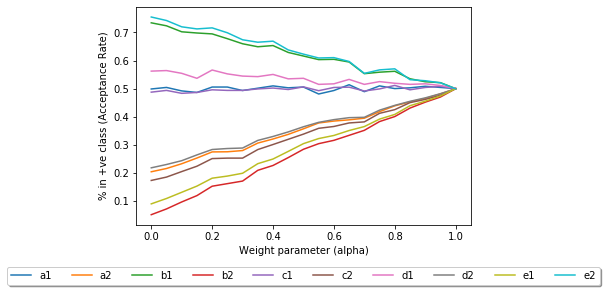

In [28]:
#1synthetic data with beta=0.5,epsilon=0.05,records=4000
# data3 = make_classification(n_samples=4000, n_features=10, n_informative=4, n_redundant=6, n_repeated=0, 
#                             n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.00, class_sep=1.0, 
#                             hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=11)
import matplotlib.pyplot as plt
import numpy as np
x=[[0.4993141289437586 ,0.20521487204249156 ,0.7343251859723698 ,0.052716514254975796 ,0.4880083420229406 ,0.17436175991309072 ,0.5627450980392157 ,0.21921397379912663 ,0.09118236472945891 ,0.7549751243781094],

[0.50480109739369 ,0.21680347658136165 ,0.7236981934112646 ,0.07315761161915008 ,0.4942648592283629 ,0.18631178707224336 ,0.5647058823529412 ,0.23100436681222708 ,0.11022044088176353 ,0.7425373134328358],

[0.4924554183813443 ,0.2337035248672139 ,0.7024442082890542 ,0.0979020979020979 ,0.48383733055265904 ,0.20586637696903856 ,0.5549019607843138 ,0.2445414847161572 ,0.13226452905811623 ,0.7201492537313433],

[0.4869684499314129 ,0.2539835828102366 ,0.6981934112646121 ,0.12049488972565896 ,0.4869655891553702 ,0.22487778381314502 ,0.5372549019607843 ,0.26506550218340613 ,0.15430861723446893 ,0.7126865671641791],

[0.5061728395061729 ,0.27571221632061804 ,0.6950053134962806 ,0.15384615384615385 ,0.49635036496350365 ,0.25203693644758285 ,0.5666666666666667 ,0.2842794759825327 ,0.18236472945891782 ,0.7164179104477612],

[0.5061728395061729 ,0.276195074843071 ,0.6780021253985122 ,0.1629908552985476 ,0.4942648592283629 ,0.2536664856056491 ,0.5529411764705883 ,0.28777292576419217 ,0.18987975951903807 ,0.6990049751243781],

[0.49382716049382713 ,0.28054080154514727 ,0.6599362380446334 ,0.17213555675094136 ,0.4942648592283629 ,0.2536664856056491 ,0.5450980392156862 ,0.28951965065502183 ,0.1998997995991984 ,0.6741293532338308],

[0.5020576131687243 ,0.30709802028005795 ,0.6493092454835282 ,0.2103281334050565 ,0.4994786235662148 ,0.28408473655621946 ,0.5431372549019607 ,0.3165938864628821 ,0.2339679358717435 ,0.6654228855721394],

[0.5102880658436214 ,0.32158377595364557 ,0.6535600425079703 ,0.22754168908015063 ,0.502606882168926 ,0.3020097772949484 ,0.5509803921568628 ,0.33056768558951966 ,0.250501002004008 ,0.6691542288557214],

[0.5034293552812071 ,0.3380009657170449 ,0.6291179596174282 ,0.25551371705217857 ,0.49739311783107404 ,0.3204780010863661 ,0.5352941176470588 ,0.3467248908296943 ,0.2775551102204409 ,0.6380597014925373],

[0.5061728395061729 ,0.3577981651376147 ,0.6163655685441021 ,0.28509951586874666 ,0.5067778936392076 ,0.3389462248777838 ,0.5372549019607843 ,0.3650655021834061 ,0.30511022044088176 ,0.6231343283582089],

[0.48148148148148145 ,0.3785610816030903 ,0.6036131774707758 ,0.30500268961807425 ,0.4932221063607925 ,0.35958718087995656 ,0.515686274509804 ,0.3807860262008734 ,0.32314629258517036 ,0.6094527363184079],

[0.49382716049382713 ,0.3853211009174312 ,0.6046758767268863 ,0.3168370091447015 ,0.5046923879040668 ,0.3661053775122216 ,0.5176470588235295 ,0.39039301310043667 ,0.33416833667334667 ,0.6106965174129353],

[0.51440329218107 ,0.3896668276195075 ,0.5951115834218916 ,0.3345884884346423 ,0.5057351407716372 ,0.378598587724063 ,0.5333333333333333 ,0.39737991266375544 ,0.3517034068136273 ,0.5970149253731343],

[0.4897119341563786 ,0.39546112988894255 ,0.5536663124335813 ,0.3523399677245831 ,0.4921793534932221 ,0.3824008690928843 ,0.515686274509804 ,0.3986899563318777 ,0.3657314629258517 ,0.554726368159204],

[0.5102880658436214 ,0.4186383389666828 ,0.5589798087141339 ,0.38353953738569124 ,0.4994786235662148 ,0.41281912004345467 ,0.5254901960784314 ,0.4240174672489083 ,0.39228456913827653 ,0.5671641791044776],

[0.5006858710562414 ,0.43940125543215836 ,0.5621679064824655 ,0.40129101667563205 ,0.5119916579770595 ,0.42585551330798477 ,0.5196078431372549 ,0.4410480349344978 ,0.4088176352705411 ,0.5708955223880597],

[0.5034293552812071 ,0.4534041525832931 ,0.5356004250797024 ,0.4314147391070468 ,0.49635036496350365 ,0.4508419337316676 ,0.515686274509804 ,0.4554585152838428 ,0.43987975951903807 ,0.5323383084577115],

[0.5089163237311386 ,0.46547561564461615 ,0.5249734325185972 ,0.4523937600860678 ,0.5046923879040668 ,0.46224877783813145 ,0.5176470588235295 ,0.46768558951965067 ,0.4559118236472946 ,0.5286069651741293],

[0.50480109739369 ,0.48189280540801543 ,0.5217853347502657 ,0.4706831629908553 ,0.5088633993743483 ,0.47691472026072784 ,0.5117647058823529 ,0.48253275109170307 ,0.4744488977955912 ,0.5211442786069652],

[0.5006858710562414 ,0.5002414292612265 ,0.5005313496280552 ,0.5002689618074233 ,0.5005213764337852 ,0.5002715915263444 ,0.5019607843137255 ,0.5 ,0.500501002004008 ,0.5],

[0.5006858710562414 ,0.5002414292612265 ,0.5005313496280552 ,0.5002689618074233 ,0.5005213764337852 ,0.5002715915263444 ,0.5019607843137255 ,0.5 ,0.500501002004008 ,0.5]]



a=[x[i][0] for i in range(21)]   
b=[x[i][1] for i in range(21)] 
c=[x[i][2] for i in range(21)]   
d=[x[i][3] for i in range(21)] 
e=[x[i][4] for i in range(21)]   
f=[x[i][5] for i in range(21)] 
g=[x[i][6] for i in range(21)]  
h=[x[i][7] for i in range(21)]   
i=[x[i][8] for i in range(21)] 
j=[x[i][9] for i in range(21)]  


Discrepancy=np.arange(0,1.05,0.05)   
 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,a,label='a1')   
ax.plot(Discrepancy,b,label='a2')  
ax.plot(Discrepancy,c,label='b1')  
ax.plot(Discrepancy,d,label='b2')  
ax.plot(Discrepancy,e,label='c1')   
ax.plot(Discrepancy,f,label='c2')  
ax.plot(Discrepancy,g,label='d1') 
ax.plot(Discrepancy,h,label='d2')   
ax.plot(Discrepancy,i,label='e1')  
ax.plot(Discrepancy,j,label='e2') 


   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


# plt.axis([0, 20, 0, 0.3])
# plt.xlabel('Weight parameter (alpha)')
# plt.ylabel('% in +ve class (Acceptance Rate)')

plt.show() 

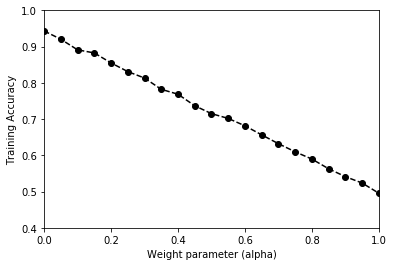

In [24]:
import matplotlib.pyplot as plt
import numpy as np

acc=[0.9432142857142857, 0.9203571428571429, 0.8910714285714286, 0.8825, 0.855, 0.8310714285714286, 0.8132142857142857, 0.7821428571428571, 0.7685714285714286, 0.7367857142857143, 0.715, 0.7017857142857142, 0.6814285714285714, 0.6564285714285715, 0.6321428571428571, 0.6096428571428572, 0.5896428571428571, 0.5628571428571428, 0.5410714285714285, 0.5235714285714286, 0.4953571428571429]
DI=np.arange(0,1.05,0.05)



plt.axis([0, 1, 0.4, 1])
plt.xlabel('Weight parameter (alpha)')
plt.ylabel('Training Accuracy')

plt.title('')
 
plt.plot(DI,acc,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=12)   

# plt.legend([""])
plt.show() 

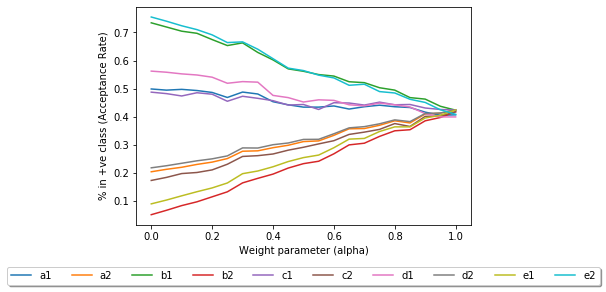

In [27]:
#1synthetic data with beta=0.4,epsilon=0.05,records=4000
# data3 = make_classification(n_samples=4000, n_features=10, n_informative=4, n_redundant=6, n_repeated=0, 
#                             n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.00, class_sep=1.0, 
#                             hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=11)
import matplotlib.pyplot as plt
import numpy as np
x=[[0.4993141289437586 ,0.20521487204249156 ,0.7343251859723698 ,0.052716514254975796 ,0.4880083420229406 ,0.17436175991309072 ,0.5627450980392157 ,0.21921397379912663 ,0.09118236472945891 ,0.7549751243781094],

[0.49519890260631 ,0.21390632544664415 ,0.7194473963868225 ,0.06831629908552986 ,0.48279457768508866 ,0.18522542096686584 ,0.5588235294117647 ,0.22663755458515283 ,0.10470941883767534 ,0.7400497512437811],

[0.49794238683127573 ,0.22114920328343796 ,0.7045696068012752 ,0.0849919311457773 ,0.4744525547445255 ,0.19880499728408474 ,0.5529411764705883 ,0.2353711790393013 ,0.11973947895791583 ,0.7238805970149254],
[0.49382716049382713 ,0.2312892322549493 ,0.6971307120085016 ,0.0984400215169446 ,0.4859228362877998 ,0.20260727865290604 ,0.5490196078431373 ,0.2441048034934498 ,0.1342685370741483 ,0.7101990049751243],

[0.4869684499314129 ,0.23949782713664897 ,0.6748140276301806 ,0.11619150080688542 ,0.4807090719499479 ,0.2118413905486149 ,0.5411764705882353 ,0.25109170305676853 ,0.14779559118236474 ,0.6915422885572139],

[0.4691358024691358 ,0.2520521487204249 ,0.6535600425079703 ,0.13394298009682626 ,0.4556830031282586 ,0.23193916349809887 ,0.5196078431372549 ,0.26157205240174675 ,0.1653306613226453 ,0.664179104477612],

[0.4883401920438957 ,0.27812650893288265 ,0.6631243358129649 ,0.16568047337278108 ,0.47340980187695514 ,0.25964149918522544 ,0.5254901960784314 ,0.28995633187772923 ,0.19839679358717435 ,0.6666666666666666],

[0.48148148148148145 ,0.27957508450024143 ,0.6291179596174282 ,0.18181818181818182 ,0.46611053180396245 ,0.2623574144486692 ,0.5235294117647059 ,0.28951965065502183 ,0.20791583166332667 ,0.6405472636815921],

[0.4540466392318244 ,0.2906808305166586 ,0.6025504782146652 ,0.1968800430338892 ,0.45776850886339937 ,0.26833242802824553 ,0.4764705882352941 ,0.30131004366812225 ,0.22294589178356713 ,0.6069651741293532],

[0.4430727023319616 ,0.2993722839208112 ,0.5706695005313497 ,0.21839698762775686 ,0.4421272158498436 ,0.28191200434546443 ,0.46862745098039216 ,0.3074235807860262 ,0.24148296593186372 ,0.5733830845771144],
[0.4348422496570645 ,0.31240946402704006 ,0.5621679064824655 ,0.2339967724583109 ,0.44421272158498437 ,0.2922324823465508 ,0.45294117647058824 ,0.3200873362445415 ,0.25551102204408815 ,0.5646766169154229],
[0.4348422496570645 ,0.3148237566393047 ,0.5504782146652497 ,0.24260355029585798 ,0.4264859228362878 ,0.3041825095057034 ,0.46078431372549017 ,0.3205240174672489 ,0.26452905811623245 ,0.5485074626865671],

[0.438957475994513 ,0.33462095605987446 ,0.5451647183846972 ,0.2689618074233459 ,0.4504692387904067 ,0.3155893536121673 ,0.4588235294117647 ,0.34017467248908295 ,0.2905811623246493 ,0.5385572139303483],

[0.4279835390946502 ,0.3577981651376147 ,0.5249734325185972 ,0.3006993006993007 ,0.4494264859228363 ,0.3378598587724063 ,0.44313725490196076 ,0.3611353711790393 ,0.3211422845691383 ,0.5124378109452736],

[0.43621399176954734 ,0.35876388218252053 ,0.5217853347502657 ,0.3066164604626143 ,0.4421272158498436 ,0.34600760456273766 ,0.4392156862745098 ,0.3655021834061135 ,0.32364729458917835 ,0.5161691542288557],
[0.44170096021947874 ,0.37035248672139065 ,0.5037194473963869 ,0.33082302313071543 ,0.45255474452554745 ,0.35578489951113523 ,0.44901960784313727 ,0.37554585152838427 ,0.34819639278557113 ,0.4900497512437811],

[0.43621399176954734 ,0.38628681796233705 ,0.4952178533475027 ,0.35072619688004303 ,0.443169968717414 ,0.376425855513308 ,0.44313725490196076 ,0.3895196506550218 ,0.36472945891783565 ,0.48507462686567165],

[0.4334705075445816 ,0.3785610816030903 ,0.46865037194473963 ,0.3544916621839699 ,0.44421272158498437 ,0.3661053775122216 ,0.43529411764705883 ,0.3834061135371179 ,0.36472945891783565 ,0.4626865671641791],

[0.4170096021947874 ,0.4104297440849831 ,0.463336875664187 ,0.3862291554599247 ,0.4316996871741397 ,0.40195545898967955 ,0.4117647058823529 ,0.41222707423580784 ,0.39629258517034066 ,0.45149253731343286],

[0.4060356652949246 ,0.4133268952197006 ,0.43783209351753455 ,0.3980634749865519 ,0.4264859228362878 ,0.4035850081477458 ,0.4 ,0.41397379912663756 ,0.405811623246493 ,0.4253731343283582],
[0.4074074074074074 ,0.42491549975857074 ,0.42401700318809776 ,0.4185045723507262 ,0.424400417101147 ,0.41825095057034223 ,0.4 ,0.4248908296943231 ,0.4248496993987976 ,0.4092039800995025],
[0.4074074074074074 ,0.42491549975857074 ,0.42401700318809776 ,0.4185045723507262 ,0.424400417101147 ,0.41825095057034223 ,0.4 ,0.4248908296943231 ,0.4248496993987976 ,0.4092039800995025]]

a=[x[i][0] for i in range(21)]   
b=[x[i][1] for i in range(21)] 
c=[x[i][2] for i in range(21)]   
d=[x[i][3] for i in range(21)] 
e=[x[i][4] for i in range(21)]   
f=[x[i][5] for i in range(21)] 
g=[x[i][6] for i in range(21)]  
h=[x[i][7] for i in range(21)]   
i=[x[i][8] for i in range(21)] 
j=[x[i][9] for i in range(21)]  


Discrepancy=np.arange(0,1.05,0.05)  
 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,a,label='a1')   
ax.plot(Discrepancy,b,label='a2')  
ax.plot(Discrepancy,c,label='b1')  
ax.plot(Discrepancy,d,label='b2')  
ax.plot(Discrepancy,e,label='c1')   
ax.plot(Discrepancy,f,label='c2')  
ax.plot(Discrepancy,g,label='d1') 
ax.plot(Discrepancy,h,label='d2')   
ax.plot(Discrepancy,i,label='e1')  
ax.plot(Discrepancy,j,label='e2') 


   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


# plt.axis([0, 20, 0, 0.3])
# plt.xlabel('Weight parameter (alpha)')
# plt.ylabel('% in +ve class (Acceptance Rate)')

plt.show() 

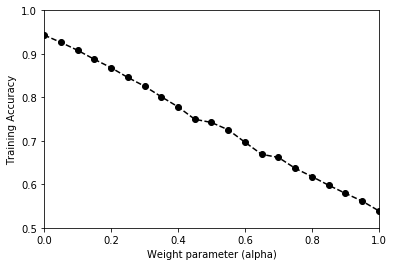

In [25]:
import matplotlib.pyplot as plt
import numpy as np

acc=[0.9432142857142857, 0.9264285714285714, 0.9082142857142858, 0.8875, 0.8682142857142857, 0.8457142857142858, 0.8257142857142857, 0.8014285714285714, 0.7782142857142857, 0.7496428571428572, 0.7421428571428571, 0.7253571428571428, 0.6967857142857142, 0.6689285714285714, 0.6617857142857143, 0.6367857142857143, 0.6178571428571429, 0.5978571428571429, 0.5792857142857143, 0.5614285714285714, 0.5389285714285714]

DI=np.arange(0,1.05,0.05)

plt.axis([0, 1, 0.5, 1])
plt.xlabel('Weight parameter (alpha)')
plt.ylabel('Training Accuracy')

plt.title('')
 
plt.plot(DI,acc,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=12)   

# plt.legend([""])
plt.show() 
